#1 使用弹性网预测波士顿房价

样本个数：506, 特征个数：13
(506,)
开始建模...


超参数： 0.0177827941004
L1 ratio： 0.99
[ 36 149 139  75 131   3 116 134  10 118  87 106  13 148  48  94 121 130
 140  39  91 137 132  43  96  98  38  30  12  58  67  66  54  50   8 114
  44 145  35  47  56  81  57 111  11 133  79 127  60   9  99  29   7 125
  90  21  24 122  27  26 128  42 101   5  70  31  41  33  64 124  46 113
  22  32 108   6  19  61 123   4  86  71  45  59 103  55 107  92 104   0
  78  69 150 105  85   2  16 117  51  25  89  88  80  72  34  74  20  40
 136 144  52  95  77 115 141  97  93 143 138 109 102 112  68  49  82 100
 151  15  23  18  65 120  73  63 146  62 129  17 126 135 147 142  28 110
  53  83  76  14 119  84   1  37]
R2: 0.806333520611
均方误差： 16.1257365581


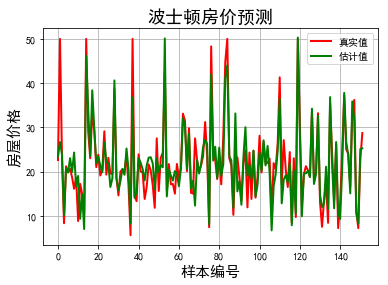

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings
# import exceptions


if __name__ == "__main__":
    warnings.filterwarnings(action='ignore')
    np.set_printoptions(suppress=True)
    file_data = pd.read_csv('data/housing.data', header=None)
    x, y = file_data[np.arange(13)], file_data[13]
    print(u'样本个数：%d, 特征个数：%d' % x.shape)
    print(y.shape)
    y = y.ravel()

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)
    model = Pipeline([
        ('ss', StandardScaler()),
        ('poly', PolynomialFeatures(degree=3, include_bias=True)),
        ('linear', ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.99, 1], alphas=np.logspace(-3, 2, 5),
                                fit_intercept=False, max_iter=1e3, cv=3))
    ])
    print(u'开始建模...')

    model.fit(x_train, y_train)
    linear = model.get_params('linear')['linear']
    print(u'超参数：', linear.alpha_)
    print(u'L1 ratio：', linear.l1_ratio_)
    # print u'系数：', linear.coef_.ravel()

    order = y_test.argsort(axis=0)
    print(order)
    # y_test = y_test[order]
    # x_test = x_test[order, :]
    y_pred = model.predict(x_test)
    r2 = model.score(x_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    print('R2:', r2)
    print(u'均方误差：', mse)

    t = np.arange(len(y_pred))
    mpl.rcParams['font.sans-serif'] = [u'simHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(facecolor='w')
    plt.plot(t, y_test, 'r-', lw=2, label=u'真实值')
    plt.plot(t, y_pred, 'g-', lw=2, label=u'估计值')
    plt.legend(loc='best')
    plt.title(u'波士顿房价预测', fontsize=18)
    plt.xlabel(u'样本编号', fontsize=15)
    plt.ylabel(u'房屋价格', fontsize=15)
    plt.grid()
    plt.show()